In [4]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd


In [10]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz using pyarrow


In [11]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0           127   525747  1.726062e+09  0.123641  0.045951  0.323994   
 1           127   525748  1.726062e+09  0.123443  0.045991  0.323931   
 2           127   525749  1.726062e+09  0.123272  0.045994  0.323934   
 3           127   525750  1.726062e+09  0.123173  0.045981  0.324000   
 4           127   525751  1.726062e+09  0.123121  0.045986  0.324058   
 ...         ...      ...           ...       ...       ...       ...   
 7293875   38925  8327680  1.726140e+09 -0.075826 -0.138745  0.321760   
 7293876   38925  8327681  1.726140e+09 -0.076105 -0.138408  0.323635   
 7293877   38925  8327682  1.726140e+09 -0.076344 -0.138119  0.325686   
 7293878   38925  8327683  1.726140e+09 -0.076725 -0.137698  0.327572   
 7293879   38925  8327684  1.726140e+09 -0.079485 -0.134849  0.323094   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.014229  0.001461 -0.003014  1.708381e-07

In [7]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [8]:
df = pd.DataFrame(timestamps, columns=['timestamp'])
df.to_csv(r'C:\Users\pandey\Documents\timestamps.csv', index=False)


In [12]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [ ]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{257,
 522,
 553,
 569,
 597,
 640,
 929,
 1535,
 1579,
 2245,
 2656,
 2751,
 3133,
 3197,
 3203,
 3403,
 4153,
 4946,
 5593,
 6743,
 6967,
 7505,
 7539,
 8445,
 9857,
 10148,
 10319,
 10820,
 11131,
 11590,
 12659,
 13070,
 15046,
 15054,
 15274,
 16058,
 16555,
 16581,
 16818,
 16954,
 17444,
 17609,
 17764,
 17776,
 18335,
 18459,
 18898,
 19496,
 19896,
 20106,
 20324,
 20444,
 20640,
 20754,
 20773,
 21002,
 21007,
 21366,
 21608,
 22032,
 22976,
 23587,
 23590,
 23591,
 23593,
 23594,
 23606,
 23821,
 23871,
 23891,
 24051,
 24208,
 24237,
 24306,
 24328,
 24375,
 24377,
 24402,
 24408,
 24409,
 24416,
 24438,
 24545,
 24810,
 24856,
 24919,
 25538,
 25679,
 26128,
 26401,
 26677,
 26960,
 27121,
 28886,
 28970,
 29231,
 29232,
 29662,
 29783,
 30117,
 31485,
 32358,
 32368,
 32406,
 32437,
 33406,
 33475,
 33758,
 34141,
 34628,
 34656,
 34999,
 35591,
 35735,
 35736,
 35738,
 35870,
 36666,
 36812,
 36823,
 36845,
 37078,
 37091,
 37586,
 37617,
 37801,
 38043,
 38061,
 38361,


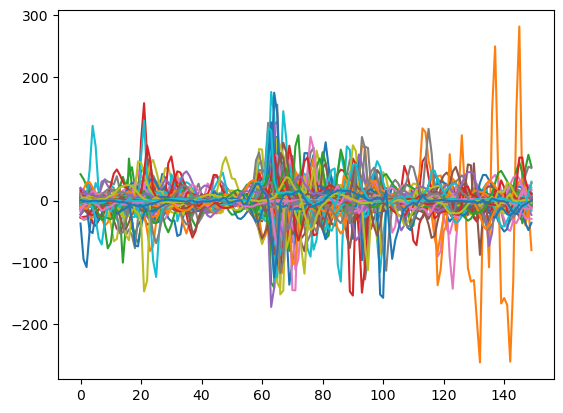

In [ ]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

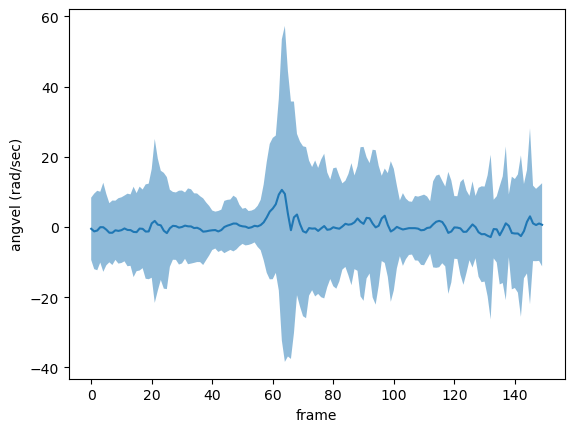

In [ ]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

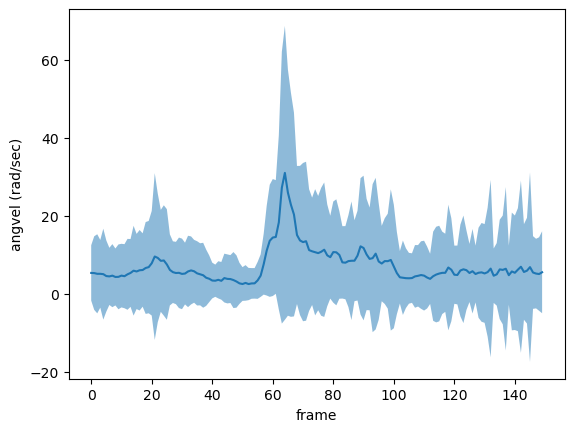

In [ ]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

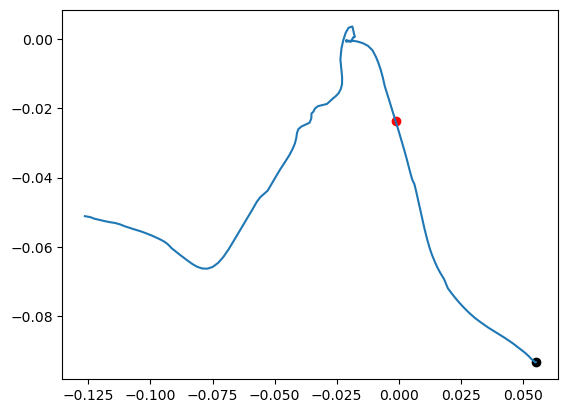

In [ ]:
i = 0
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [13]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

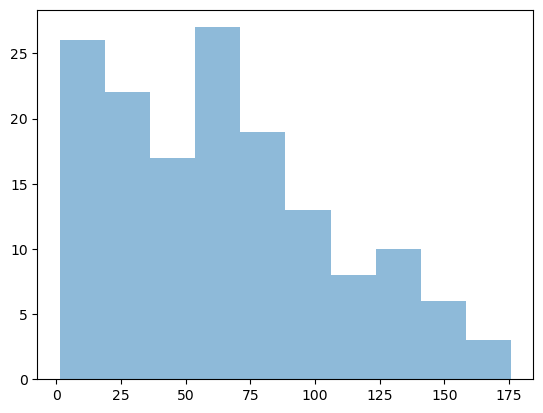

In [14]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [15]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

63.651079176324544
Standard Deviation of data1_max: 43.3526
Standard Error of data1_max: 3.5280


In [16]:
print(f"Shape of data1_max: {data1_max.shape}")

Shape of data1_max: (151,)


In [17]:
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of flattened data: (151,)
D'Agostino's K-squared Test Statistic: 8.3897837974679
P-value: 0.015072371716490219
